## Read and clean data as needed

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [5]:
for dirname, _, filenames in os.walk('/Resources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df = pd.read_csv("Resources/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# check dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# check columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
# drop the last column
df = df.drop(columns = 'Unnamed: 32')

In [11]:
# check if there is any missing data
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
# check data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preliminary Analysis (Descriptives/Statistics Summary)

In [13]:
# understanding the data variables

# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension ("coastline approximation" - 1)

In [14]:
# drop id column for further analysis
updated_df = df.drop(columns='id')

# check dataset
updated_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


diagnosis
B    357
M    212
Name: diagnosis, dtype: int64


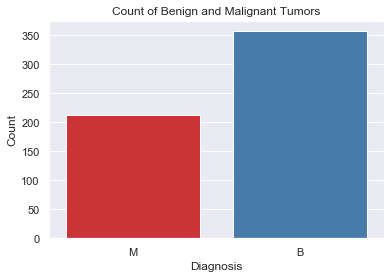

In [15]:
# count no. of benign and malignant tumors
count_df = updated_df.groupby('diagnosis')
print(count_df['diagnosis'].count())

sns.set(style="darkgrid")

# create bar chart
ax_bar = sns.countplot(x="diagnosis", data=updated_df, palette="Set1")
plt.title("Count of Benign and Malignant Tumors");
plt.ylabel("Count");
plt.xlabel("Diagnosis");

In [16]:
# recode diagnosis column to 1 (malignant) and 0 (benign)
def tumor(row):
    if row['diagnosis'] == 'B':
        return 0
    if row['diagnosis'] == 'M':
        return 1
    
# create a new column with the recoded values
updated_df['tumor'] = updated_df.apply (lambda row: tumor(row), axis=1)

# calculate correlation coefficients
corr_df = updated_df.corr()
corr_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


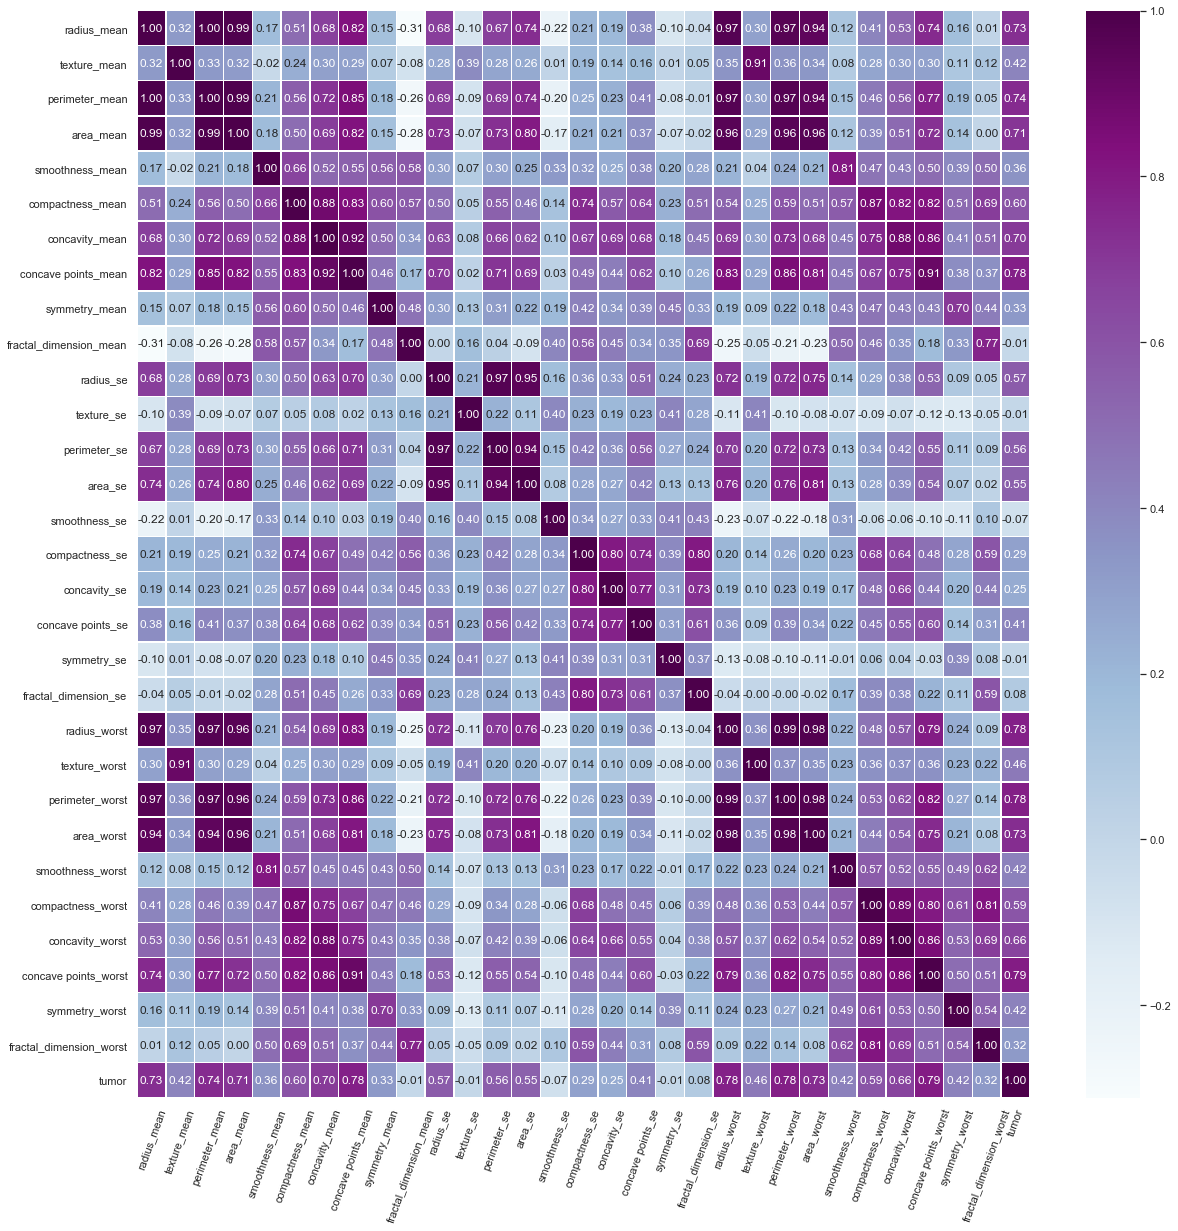

In [17]:
# since there are ~29 features in the data, we have decided to look at the correlation heatmap to determine the features
# that we want to include in our classification models

# correlation heatmap
f,ax1 = plt.subplots(figsize=(20, 20))
sns.heatmap(updated_df.corr(), cmap='BuPu',annot=True, linewidths=.5, fmt= '.2f',ax=ax1)
plt.xticks(fontsize=11,rotation=70)
plt.show()

## Prep Data for Classifical Models

In [18]:
# create the y variable
y= df['diagnosis'].map({'M':1,'B':0})

In [19]:
# create a dataframe with selected features based on correlation results (keeping those with coefficient of .5 and above)
X = df[['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']]

In [20]:
# create train and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42)
N ,D = X_train.shape

In [21]:
# scale/normalize the train and test data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
# This function runs the Predictor. It prints how many inaccurate predictions were made and whether the
# model is over predicting or under predicting
def Predictor(classifier, name):
    predictions = classifier.predict(X_test)
    predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
    predictions_df["Sum"] = predictions_df.sum(axis=1)
    predictions_df = predictions_df[predictions_df.Sum == 1]

    inaccurate_predictions = len(predictions_df)
    false_positives = predictions_df["Prediction"].sum()
    false_negatives = predictions_df["Actual"].sum()
    difference = false_positives - false_negatives

    print(f"Results for {name} classifier using test data:\n"
          f"Inaccurate Predictions: {inaccurate_predictions}\n"
          f"False Positives: {false_positives}\n"
          f"False Negatives: {false_negatives}\n"
          f"Difference (positive is good): {difference}\n")
    
    # plot confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{:.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    categories = ['Benign', 'Malignant']
    sns.heatmap(cf_matrix, fmt = '', annot = labels, xticklabels = categories, yticklabels = categories, cmap = 'BuPu')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.savefig(f'Resources/Plots/{name}.jpg', dpi=300)
    # plot ROC curves
    fpr, tpr, _ = roc_curve(predictions,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    #plt.title(f"Receiver operating characteristic - {name}")
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.legend(loc="lower right")
    plt.savefig(f'Resources/Plots/{name}2.jpg', dpi=300)
    plt.show()
    

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [25]:
logreg.fit(X_train, y_train)

print(f"Training Data Score: {logreg.score(X_train, y_train)}")
print(f"Testing Data Score: {logreg.score(X_test, y_test)}")

Training Data Score: 0.9763779527559056
Testing Data Score: 0.973404255319149


Feature 0: radius_mean, Score: 0.47002
Feature 1: perimeter_mean, Score: 0.44605
Feature 2: area_mean, Score: 0.46775
Feature 3: compactness_mean, Score: -1.05268
Feature 4: concavity_mean, Score: 0.03204
Feature 5: concave points_mean, Score: 1.19266
Feature 6: radius_se, Score: 1.05117
Feature 7: perimeter_se, Score: 0.43406
Feature 8: area_se, Score: 0.76941
Feature 9: radius_worst, Score: 1.24563
Feature 10: texture_worst, Score: 1.41099
Feature 11: perimeter_worst, Score: 0.97764
Feature 12: smoothness_worst, Score: 0.93231
Feature 13: compactness_worst, Score: 0.21879
Feature 14: concavity_worst, Score: 0.76060
Feature 15: concave points_worst, Score: 1.16469


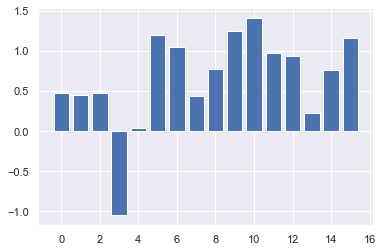

In [26]:
features = ['radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']

# get importance
importance = logreg.coef_[0]

# summarize feature importance
for i,(v1,v2) in enumerate(zip(importance,features)):
    print(f"Feature %0d: {v2}, Score: %.5f" % (i,v1))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Results for Logistic Regression classifier using test data:
Inaccurate Predictions: 5
False Positives: 2
False Negatives: 3
Difference (positive is good): -1



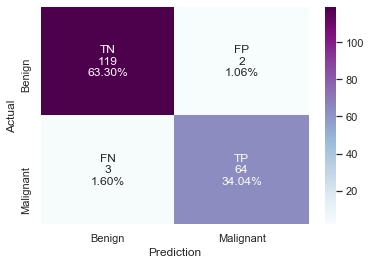

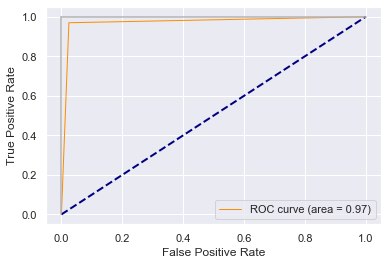

In [27]:
Predictor(logreg, 'Logistic Regression')

## Support Vector Machines

In [28]:
updated_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [29]:
target = updated_df['diagnosis']
target_names = ['M', 'B']

In [30]:
svm_data = updated_df.drop('diagnosis', axis=1)
feature_names = svm_data.columns
svm_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [31]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
 # Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.973


In [34]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           M       0.98      0.98      0.98       121
           B       0.97      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



## Decision Tree Algorithm

In [35]:
from sklearn import tree

In [36]:
feature_names = X.columns

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9095744680851063

Results for Decision Tree classifier using test data:
Inaccurate Predictions: 17
False Positives: 11
False Negatives: 6
Difference (positive is good): 5



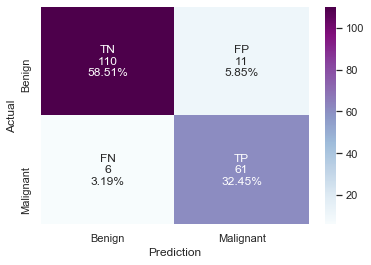

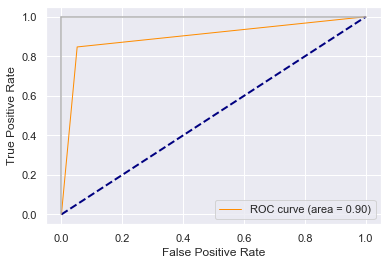

In [38]:
Predictor(clf, "Decision Tree")

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
Predictor(rf, "Random Forest")

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

In [ ]:
Predictor(knn, "K Nearest Neighbor")

# Sequential Model

In [ ]:
import tensorflow as tf

In [ ]:
### Now creating the model

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [ ]:
# Compiling the model

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
#You can avoid this error by converting your labels to arrays before calling model.fit()
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
r= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

In [ ]:
# train and test score
print("Train score",model.evaluate(X_train,y_train))
print("Test score",model.evaluate(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
Predictor(model, 'Sequential Model')

## Running the Predictor on all models

In [ ]:
#Predictor(classifier, "Logistic Regression") <-- needs to be updated with correct classifier
#Predictor(classifier, "Support Vector Machines") <-- needs to be updated with correct classifier
Predictor(clf, "Decision Tree")
Predictor(rf, "Random Forest")
Predictor(knn, "K Nearest Neighbor")

In [ ]:
# remember to add svm

# creating a roc chart with all classifiers

lr_predictions = logreg.predict(X_test)
clf_predictions = clf.predict(X_test)
rf_predictions = rf.predict(X_test)
knn_predictions = knn.predict(X_test)

lr_fpr, lr_tpr, _ = roc_curve(lr_predictions,y_test)
clf_fpr, clf_tpr, _ = roc_curve(clf_predictions,y_test)
rf_fpr, rf_tpr, _ = roc_curve(rf_predictions,y_test)
knn_fpr, knn_tpr, _ = roc_curve(knn_predictions,y_test)


lr_roc_auc = auc(lr_fpr, lr_tpr)
clf_roc_auc = auc(clf_fpr, clf_tpr)
rf_roc_auc = auc(rf_fpr, rf_tpr)
knn_roc_auc = auc(knn_fpr, knn_tpr)



plt.subplots(1, figsize=(10,10))
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=1, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(clf_fpr, clf_tpr, color='darkgreen',
         lw=1, label='Decision Tree (area = %0.2f)' % clf_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='purple',
         lw=1, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='red',
         lw=1, label='K Nearest Neighbor (area = %0.2f)' % knn_roc_auc)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()